In [1]:
import numpy as np                                #Required Libraries Added
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")  #File Included in Page

In [3]:
df.head(3)  #Shows the first 3 rows of the data set

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398
1,ADALAR,HEYBELİADA,40142,101,175,423,393,25,21,66,113,1,1,2,763
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420


In [4]:
df.tail(3)   #Shows the last 3 rows of the data set

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
956,ZEYTİNBURNU,VELİEFENDİ,40836,39,80,309,530,66,38,175,317,1,1,2,3400
957,ZEYTİNBURNU,YENİDOĞAN,40833,17,33,135,234,24,13,63,114,0,0,1,1715
958,ZEYTİNBURNU,YEŞİLTEPE,40835,26,52,211,374,45,25,118,216,0,0,1,4250


In [5]:
df.info()   #Shows general information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ilce_adi                      959 non-null    object
 1   mahalle_adi                   959 non-null    object
 2   mahalle_koy_uavt              959 non-null    int64 
 3   cok_agir_hasarli_bina_sayisi  959 non-null    int64 
 4   agir_hasarli_bina_sayisi      959 non-null    int64 
 5   orta_hasarli_bina_sayisi      959 non-null    int64 
 6   hafif_hasarli_bina_sayisi     959 non-null    int64 
 7   can_kaybi_sayisi              959 non-null    int64 
 8   agir_yarali_sayisi            959 non-null    int64 
 9   hastanede_tedavi_sayisi       959 non-null    int64 
 10  hafif_yarali_sayisi           959 non-null    int64 
 11  dogalgaz_boru_hasari          959 non-null    int64 
 12  icme_suyu_boru_hasari         959 non-null    int64 
 13  atik_su_boru_hasari 

In [6]:
df.shape  #Returns the dimensions of the data set (number of rows and columns)

(959, 15)

In [7]:
df.columns  #Lists the column names in the data set

Index(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt',
       'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi',
       'orta_hasarli_bina_sayisi', 'hafif_hasarli_bina_sayisi',
       'can_kaybi_sayisi', 'agir_yarali_sayisi', 'hastanede_tedavi_sayisi',
       'hafif_yarali_sayisi', 'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari',
       'atik_su_boru_hasari', 'gecici_barinma'],
      dtype='object')

In [8]:
df.describe().T  #Shows statistical summary of numeric columns by transposing

,count,mean,std,min,25%,50%,75%,max
mahalle_koy_uavt,959.0,70155.974974,57059.328052,16634.0,40371.5,40677.0,40949.5,192001.0
cok_agir_hasarli_bina_sayisi,959.0,14.072993,21.630965,0.0,1.0,5.0,17.0,201.0
agir_hasarli_bina_sayisi,959.0,35.801877,44.955700,0.0,6.0,20.0,48.0,313.0
orta_hasarli_bina_sayisi,959.0,152.775808,162.244740,0.0,39.0,100.0,214.5,1565.0
hafif_hasarli_bina_sayisi,959.0,314.415016,268.199687,2.0,112.5,251.0,440.0,2452.0
can_kaybi_sayisi,959.0,14.749739,28.838763,0.0,0.0,3.0,13.0,230.0
agir_yarali_sayisi,959.0,8.435871,16.524790,0.0,0.0,1.0,8.0,122.0
hastanede_tedavi_sayisi,959.0,41.330553,75.469817,0.0,1.0,11.0,39.0,592.0
hafif_yarali_sayisi,959.0,78.456726,134.451200,0.0,4.0,26.0,78.5,1028.0
dogalgaz_boru_hasari,959.0,0.371220,0.604304,0.0,0.0,0.0,1.0,4.0


In [9]:
df.isnull().any()  #Checks which columns have empty values

,0
ilce_adi,False
mahalle_adi,False
mahalle_koy_uavt,False
cok_agir_hasarli_bina_sayisi,False
agir_hasarli_bina_sayisi,False
orta_hasarli_bina_sayisi,False
hafif_hasarli_bina_sayisi,False
can_kaybi_sayisi,False
agir_yarali_sayisi,False
hastanede_tedavi_sayisi,False


In [10]:
df["ilce_adi"].value_counts()   #Shows the frequencies of the values in the 'ilce_adi' column

,count
ilce_adi,
ŞİLE,62
FATİH,57
BEYKOZ,45
BEYOĞLU,45
ESENYURT,43
ÇATALCA,39
SARIYER,38
ARNAVUTKÖY,38
PENDİK,36


In [11]:
df.groupby("ilce_adi").agg({"can_kaybi_sayisi":"sum"})  #Calculates the total number of casualties for each district

,can_kaybi_sayisi
ilce_adi,
ADALAR,76
ARNAVUTKÖY,0
ATAŞEHİR,89
AVCILAR,465
BAHÇELİEVLER,1633
BAKIRKÖY,1046
BAYRAMPAŞA,520
BAĞCILAR,1179
BAŞAKŞEHİR,71


In [12]:
df.groupby(["ilce_adi", "mahalle_adi"]).agg({"can_kaybi_sayisi":"sum"})  #Calculates the total number of casualties for each district and neighborhood

can_kaybi_sayisi
ilce_adi mahalle_adi                  
ADALAR   BURGAZADA                   8
         HEYBELİADA                 25
         KINALIADA                   5
         MADEN                      22
         NİZAM                      16
...                                ...
ŞİŞLİ    PAŞA                        4
         TEŞVİKİYE                   2
         YAYLA                       3
         İNÖNÜ                       1
         İZZET PAŞA                  2

[959 rows x 1 columns]

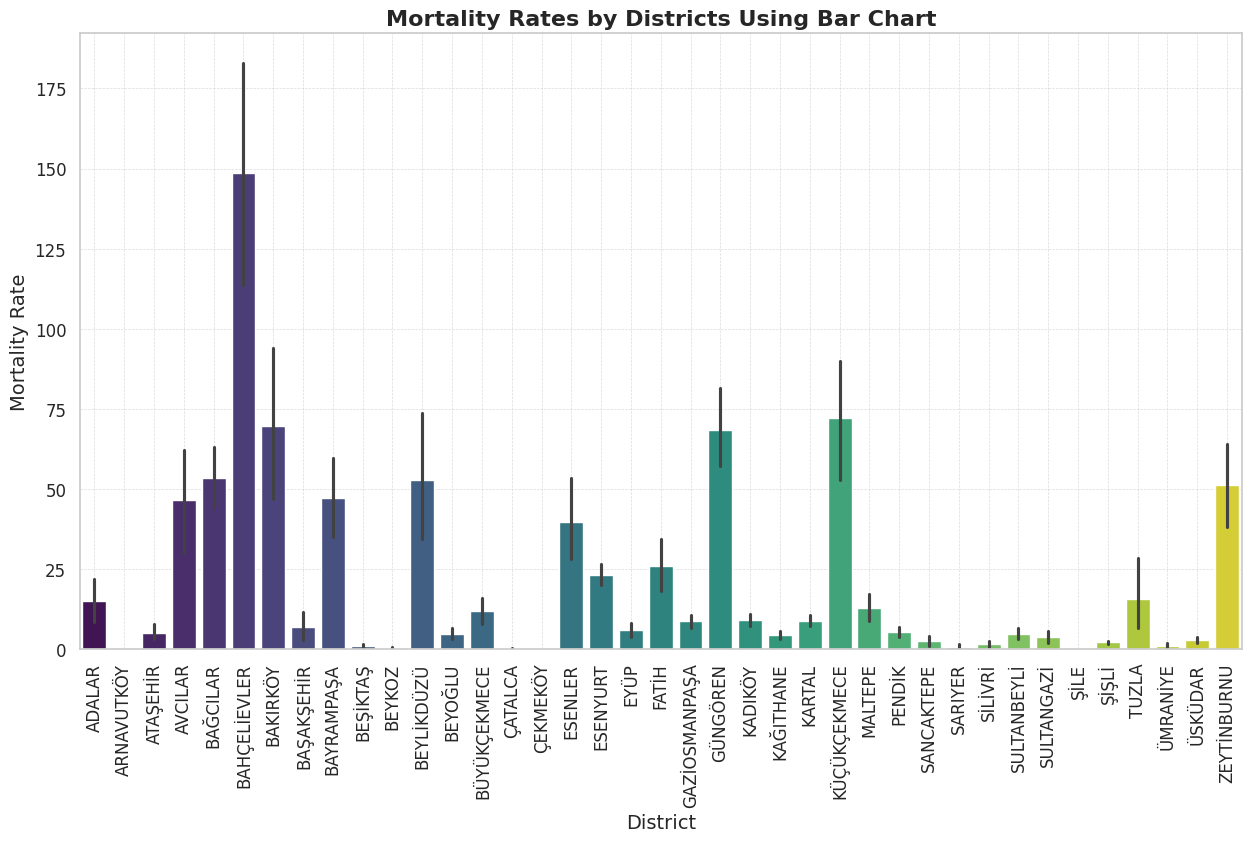

In [13]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(df['ilce_adi'].unique()))
plt.figure(figsize=(15, 8))
sns.barplot(x="ilce_adi", y="can_kaybi_sayisi", data=df, palette=palette)                         #Creating a bar chart visualizing mortality rates by district
plt.title("Mortality Rates by Districts Using Bar Chart", fontsize=16, fontweight='bold')
plt.xlabel("District", fontsize=14)
plt.ylabel("Mortality Rate", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

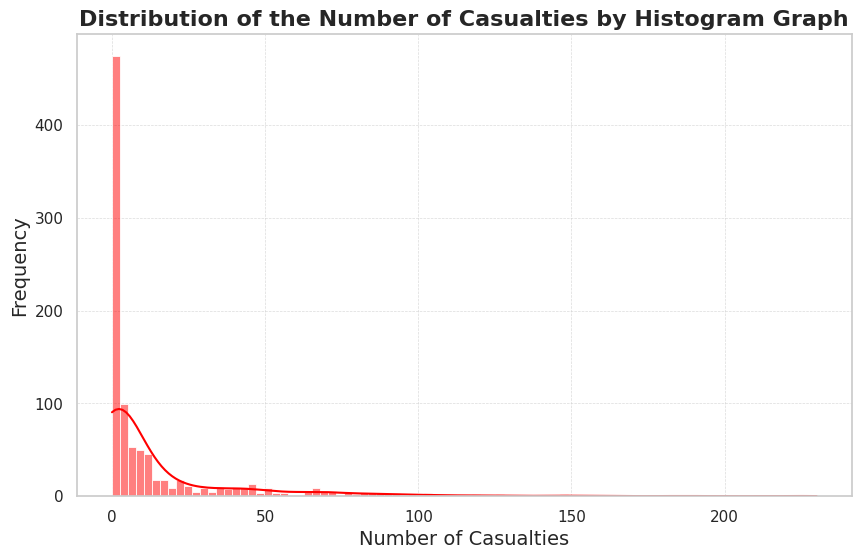

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df.can_kaybi_sayisi, kde = True, color='red')
plt.title("Distribution of the Number of Casualties by Histogram Graph", fontsize=16, fontweight='bold')
plt.xlabel("Number of Casualties", fontsize=14)                                 #Creates and displays a histogram chart visualizing the distribution of the number of casualties
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [15]:
df["can_kaybi_sayisi"].describe()  #Gives a statistical summary of the 'can_kaybi_sayisi' column

,can_kaybi_sayisi
count,959.000000
mean,14.749739
std,28.838763
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,230.000000


In [16]:
numeric_df = df.select_dtypes(include=[float, int])  #Selects numeric (float and int) columns in the data set

In [17]:
corr = numeric_df.corr()  #Calculates the correlation matrix between numeric columns

In [18]:
print(corr)  #Prints the correlation matrix on the screen

                              mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  \
mahalle_koy_uavt                      1.000000                     -0.219561   
cok_agir_hasarli_bina_sayisi         -0.219561                      1.000000   
agir_hasarli_bina_sayisi             -0.264787                      0.912125   
orta_hasarli_bina_sayisi             -0.308731                      0.763863   
hafif_hasarli_bina_sayisi            -0.367522                      0.592846   
can_kaybi_sayisi                     -0.177390                      0.831466   
agir_yarali_sayisi                   -0.173552                      0.865972   
hastanede_tedavi_sayisi              -0.190762                      0.834955   
hafif_yarali_sayisi                  -0.203439                      0.827963   
dogalgaz_boru_hasari                 -0.219315                      0.525448   
icme_suyu_boru_hasari                -0.226392                      0.539754   
atik_su_boru_hasari                  -0.

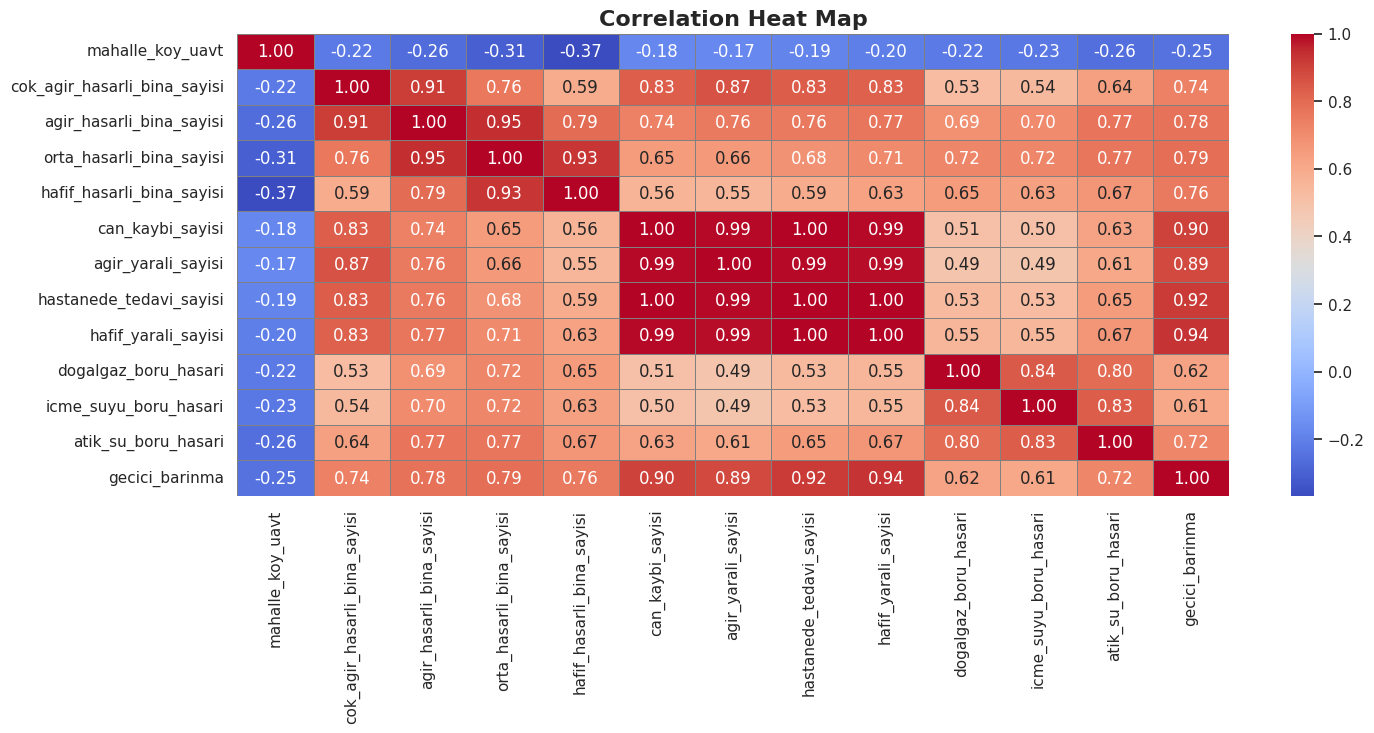

In [19]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')   #Generates and displays heat map visualizing correlations between numerical columns
plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
plt.show()

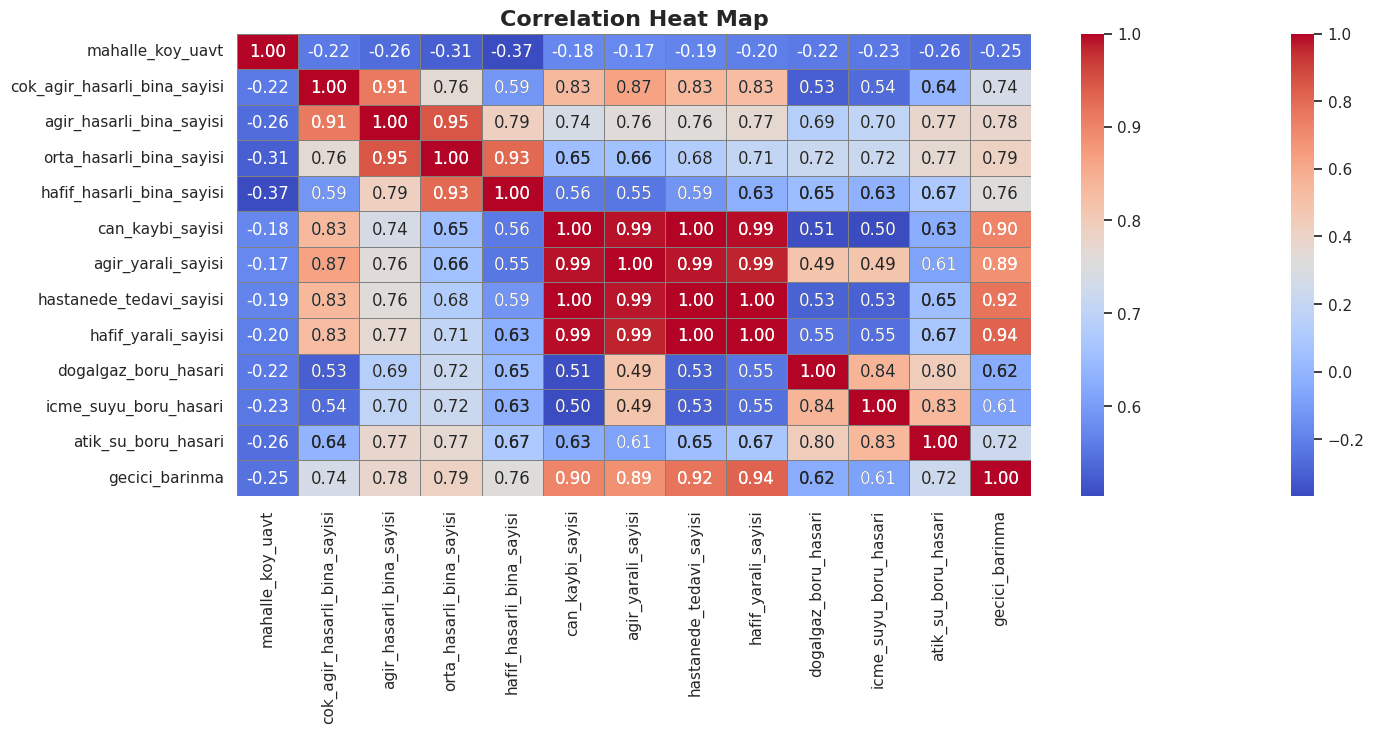

In [20]:
plt.figure(figsize=(16, 6))       #Creates and displays the heatmap hiding correlation values less than 0.5
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heat Map", fontsize=16, fontweight='bold')
mask = np.zeros_like(corr)
mask[np.abs(corr) < 0.5] = True
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray', mask=mask)

plt.show()

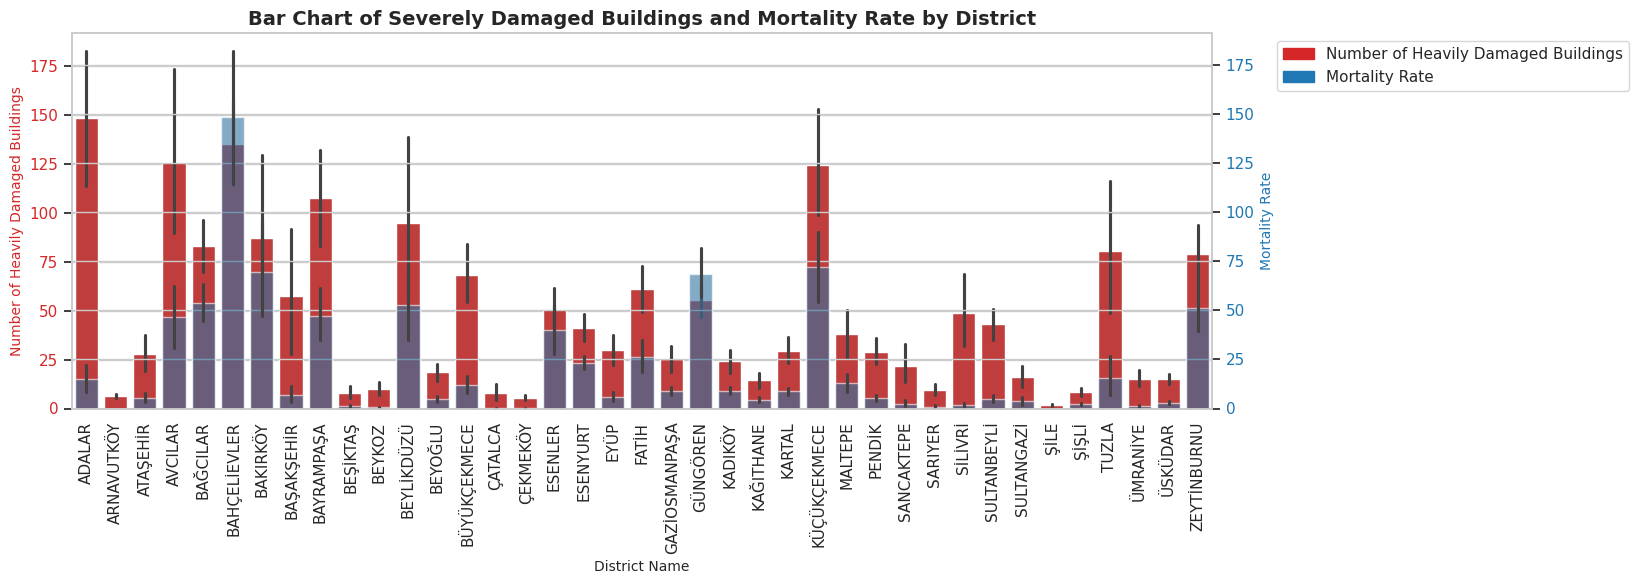

In [21]:
fig, ax1 = plt.subplots(figsize=(13, 6))

color = 'tab:red'
ax1.set_xlabel('District Name', fontsize=10)
ax1.set_ylabel('Number of Heavily Damaged Buildings', fontsize=10, color=color)
sns.barplot(x='ilce_adi', y='agir_hasarli_bina_sayisi', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)
                                              #Constructs and displays a biaxial bar graph showing the number of severely damaged buildings and mortality rate by districts
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mortality Rate', fontsize=10, color=color)
sns.barplot(x='ilce_adi', y='can_kaybi_sayisi', data=df, ax=ax2, alpha=0.6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Bar Chart of Severely Damaged Buildings and Mortality Rate by District", fontsize=14, fontweight='bold')
fig.tight_layout()

red_patch = Patch(color='tab:red', label='Number of Heavily Damaged Buildings')
blue_patch = Patch(color='tab:blue', label='Mortality Rate')
plt.legend(handles=[red_patch, blue_patch], loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

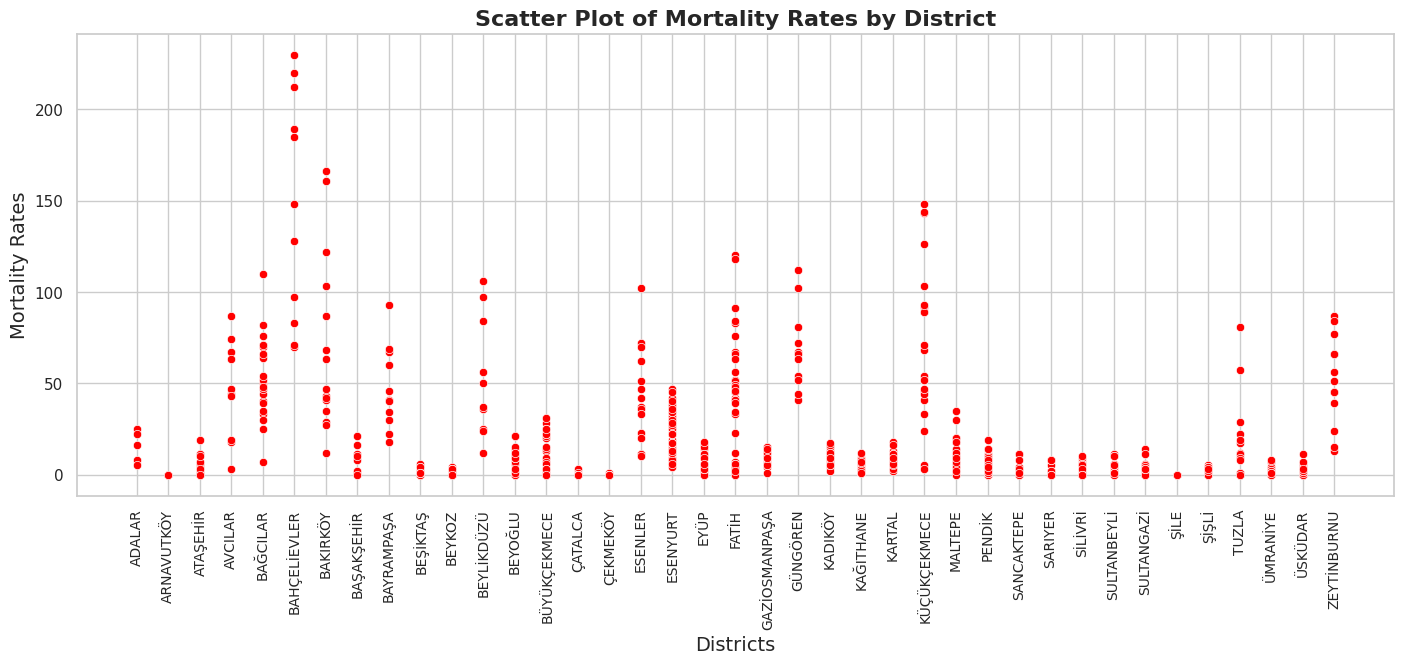

In [22]:
plt.figure(figsize=(17, 6))
sns.scatterplot(x="ilce_adi", y="can_kaybi_sayisi", color= "red", data=df)
plt.title("Scatter Plot of Mortality Rates by District", fontsize=16, fontweight= 'bold')
plt.xticks(rotation=90, fontsize=10)            #Creates and displays a scatter graph showing mortality rates by districts
plt.xlabel("Districts", fontsize=14)
plt.ylabel("Mortality Rates", fontsize=14)
plt.show()

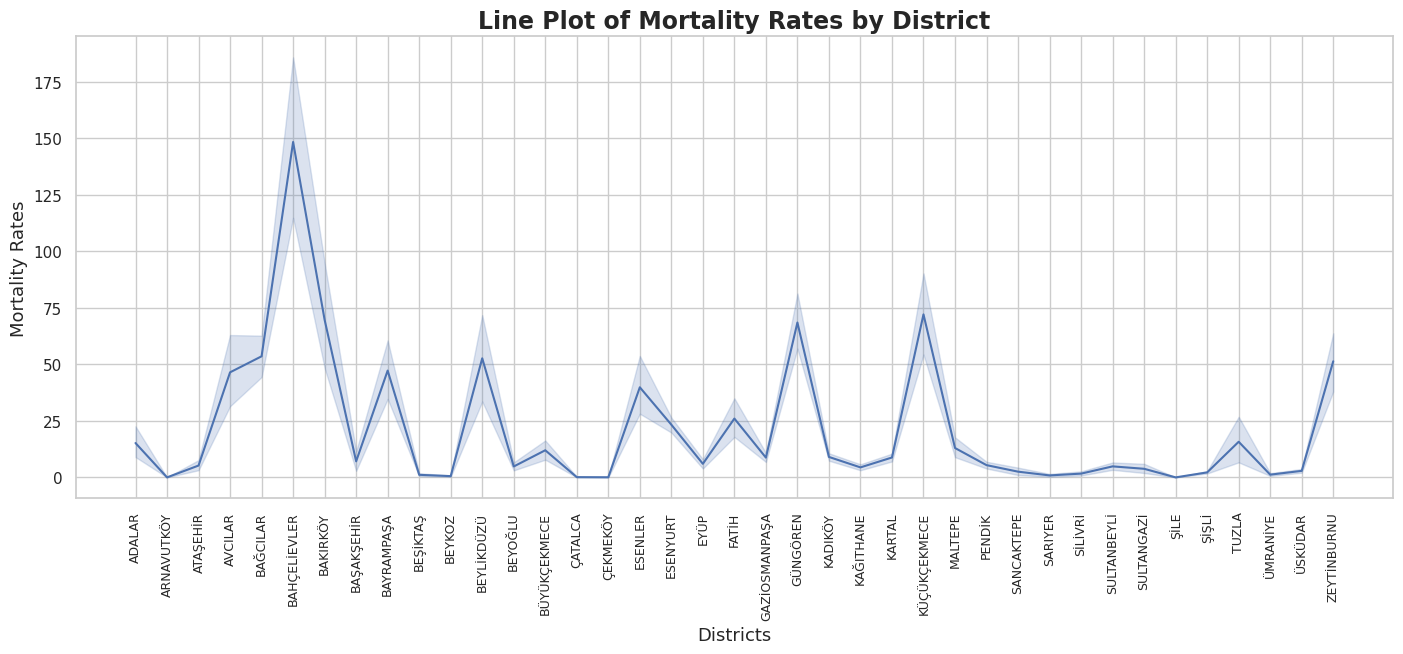

In [23]:
plt.figure(figsize=(17,6))
sns.lineplot(x= "ilce_adi", y= "can_kaybi_sayisi", data = df);
plt.title("Line Plot of Mortality Rates by District", fontsize= 17, fontweight= 'bold')
plt.xticks(rotation = 90, fontsize=9)   #Creates and displays a line graph showing mortality rates by districts
plt.xlabel("Districts", fontsize= 13)
plt.ylabel("Mortality Rates", fontsize=13)
plt.show()

In [24]:
y = df[["can_kaybi_sayisi"]]      #Target variable for the model's properties and removes some unnecessary columns
x= df.drop(["can_kaybi_sayisi", "mahalle_koy_uavt", "ilce_adi", "mahalle_adi"], axis=1)

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=11, train_size=0.70)  #Splits features and target variables into 70% training and 30% testing

In [26]:
scaler = StandardScaler()      #Standardizes and scales training data / Transforms test data with the same scaling
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
rf = RandomForestRegressor(n_estimators=300, random_state=11)  #Creates a 300-tree RandomForestRegressor model and uses a fixed randomness value to control randomness

In [28]:
model2 = rf.fit(x_train_scaled, y_train)    #Trains the RandomForestRegressor model with scaled training data

In [29]:
model2.score(x_test_scaled, y_test)   #Calculates the R² (determination) score of the model on test data and evaluates how well the model performs

0.9952491180749701

In [30]:
y_pred = rf.predict(x_test_scaled)  #Enables the model to make predictions by making predictions on test data

In [31]:
mse = mean_squared_error(y_test, y_pred)  #Calculate the mean squared error (MSE) between actual and predicted values
r2 = r2_score(y_test, y_pred)  #Calculates the R² (determination) score of the model

print(f"RandomForestRegressor MSE: {mse}")  #Prints the mean squared error (MSE) value on the screen
print(f"RandomForestRegressor R^2 Score: {r2}")  #Prints the R² score on the screen

RandomForestRegressor MSE: 3.7364529320987634
RandomForestRegressor R^2 Score: 0.9952491180749701


In [32]:
feature_importances = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

#Calculates the features of the model in order of importance and shows the most important features in order of highest to lowest importance

                         Feature  Importance
5        hastanede_tedavi_sayisi    0.807413
6            hafif_yarali_sayisi    0.104678
4             agir_yarali_sayisi    0.081103
10                gecici_barinma    0.003573
3      hafif_hasarli_bina_sayisi    0.000883
1       agir_hasarli_bina_sayisi    0.000701
2       orta_hasarli_bina_sayisi    0.000524
0   cok_agir_hasarli_bina_sayisi    0.000447
9            atik_su_boru_hasari    0.000282
8          icme_suyu_boru_hasari    0.000229
7           dogalgaz_boru_hasari    0.000167


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 33.6 MB/s eta 0:00:00


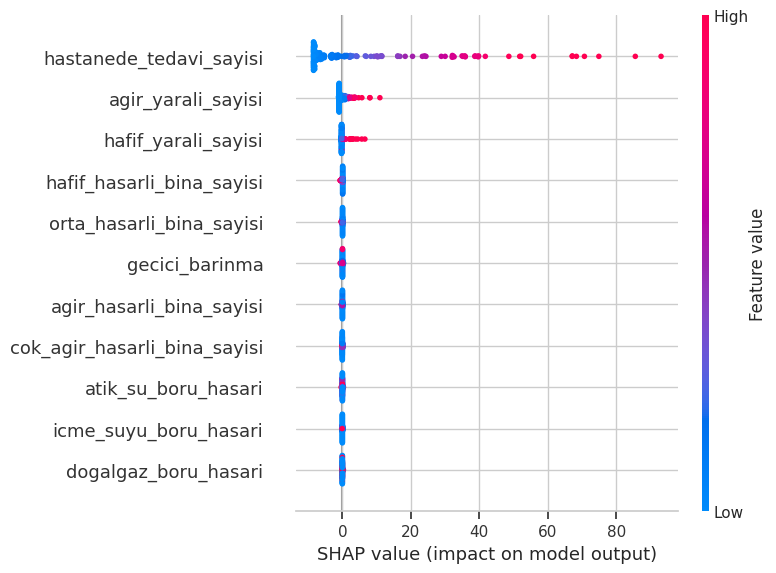

In [ ]:
!pip install shap
import shap

# Define the target variable and features
target = 'can_kaybi_sayisi'
features = df.columns.difference([target, 'ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt'])

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the feature importance
shap.summary_plot(shap_values, X_test)

In [33]:
lr = LinearRegression()  #Builds a simple linear regression model

In [34]:
model = lr.fit(x_train_scaled, y_train)  #Trains the LinearRegression model with scaled training data

In [35]:
model.score(x_test_scaled,y_test)   #Calculate the R² (determination) score of the model on test data and evaluate the performance of the model

0.9992675266296105

In [36]:
model.score(x_train_scaled, y_train)  #Calculates the R² (stability) score of the model on training data, evaluates the performance of the model on training data and examines the case of overlearning

0.9994249677543271

In [37]:
y_pred = lr.predict(x_test_scaled)  #Produces model predictions by making predictions on test data

In [38]:
mse = mean_squared_error(y_test, y_pred)  #Calculate the mean squared error (MSE) between actual and predicted values
r2 = r2_score(y_test, y_pred)  #Calculates the R² (determination) score of the model

print(f"LinearRegression MSE: {mse}")  #Prints the mean squared error (MSE) value on the screen
print(f"LinearRegression R^2 Score: {r2}")  #Prints the R² score on the screen

LinearRegression MSE: 0.576072467315381
LinearRegression R^2 Score: 0.9992675266296105


In [48]:
predictions_df = pd.DataFrame({'Gerçek Değerler': y_test.values, 'Tahmin Edilen Değerler': y_pred})
print(predictions_df)

     Gerçek Değerler  Tahmin Edilen Değerler
0                  2                    1.95
1                  4                    4.10
2                 62                   63.16
3                  0                    0.00
4                  4                    2.67
..               ...                     ...
187                0                    0.00
188                0                    0.00
189                0                    0.00
190                0                    0.32
191                0                    0.00

[192 rows x 2 columns]


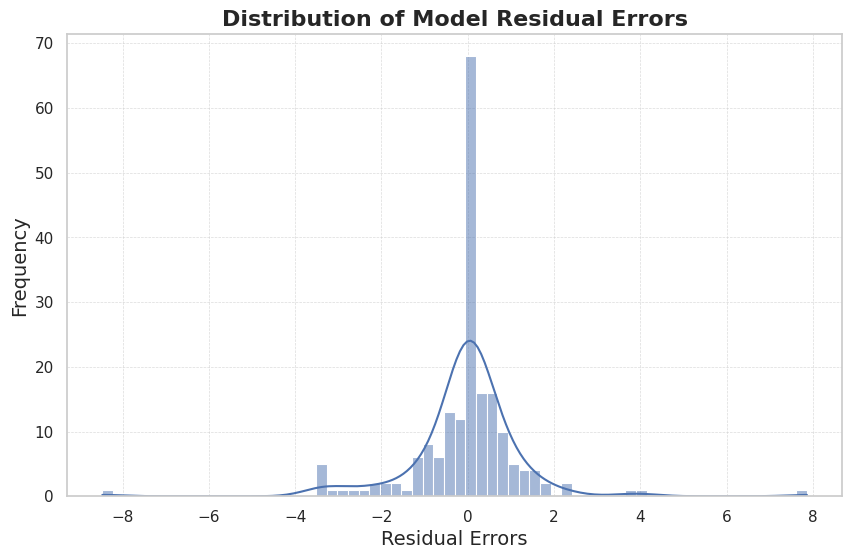

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Model Residual Errors', fontsize=16, fontweight='bold')
plt.xlabel('Residual Errors', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

#This graph shows the distribution and frequency of differences (residual errors) between model predicted values and actual values

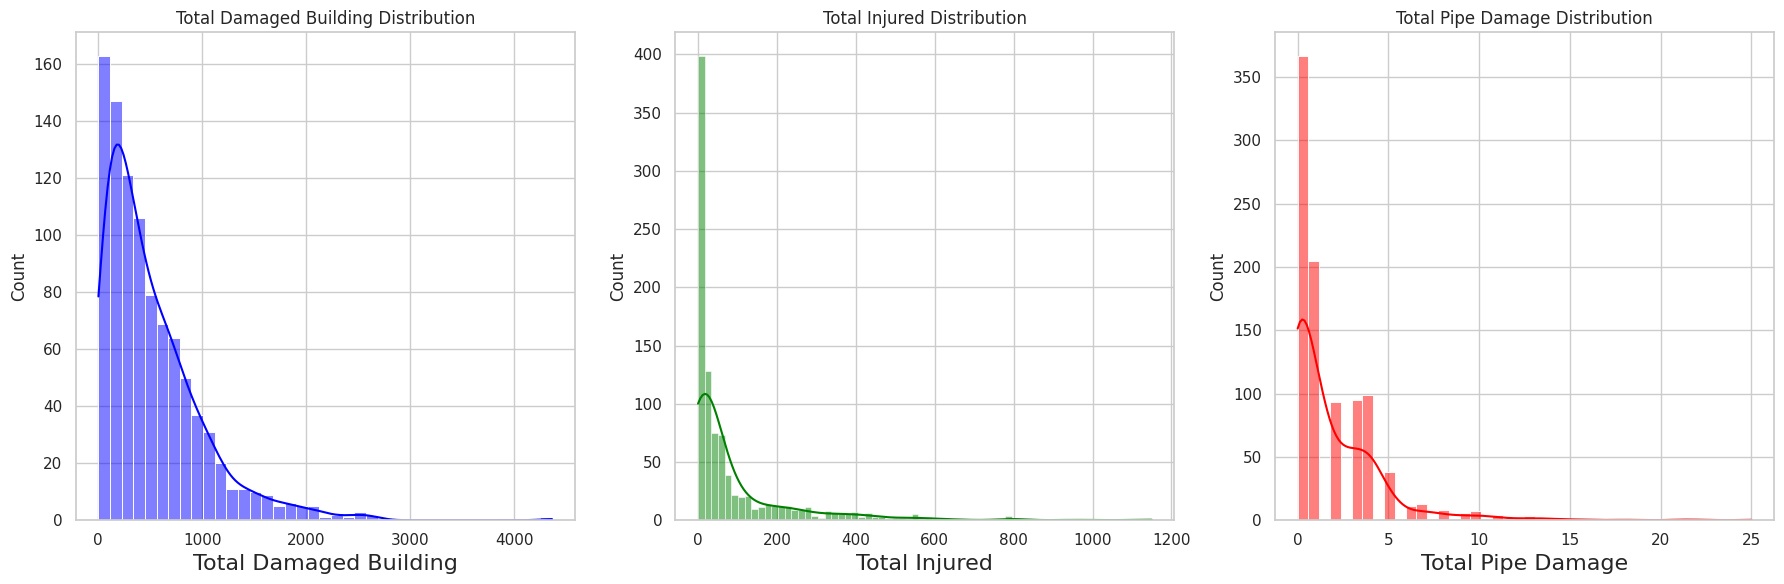

In [ ]:
df['toplam_hasarli_bina'] = df['cok_agir_hasarli_bina_sayisi'] + df['agir_hasarli_bina_sayisi'] + df['orta_hasarli_bina_sayisi'] + df['hafif_hasarli_bina_sayisi']
df['toplam_yarali'] = df['agir_yarali_sayisi'] + df['hafif_yarali_sayisi']
df['toplam_boru_hasari'] = df['dogalgaz_boru_hasari'] + df['icme_suyu_boru_hasari'] + df['atik_su_boru_hasari']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['toplam_hasarli_bina'], kde=True, color='blue')
plt.xlabel("Total Damaged Building", fontsize= 16)
plt.title('Total Damaged Building Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['toplam_yarali'], kde=True, color='green')
plt.xlabel("Total Injured", fontsize= 16)
plt.title('Total Injured Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['toplam_boru_hasari'], kde=True, color='red')
plt.xlabel("Total Pipe Damage", fontsize= 16)
plt.title('Total Pipe Damage Distribution')

plt.tight_layout()
plt.show()

#Creates and displays three histogram plots showing the distribution of total damaged buildings, total injured and total pipe damage

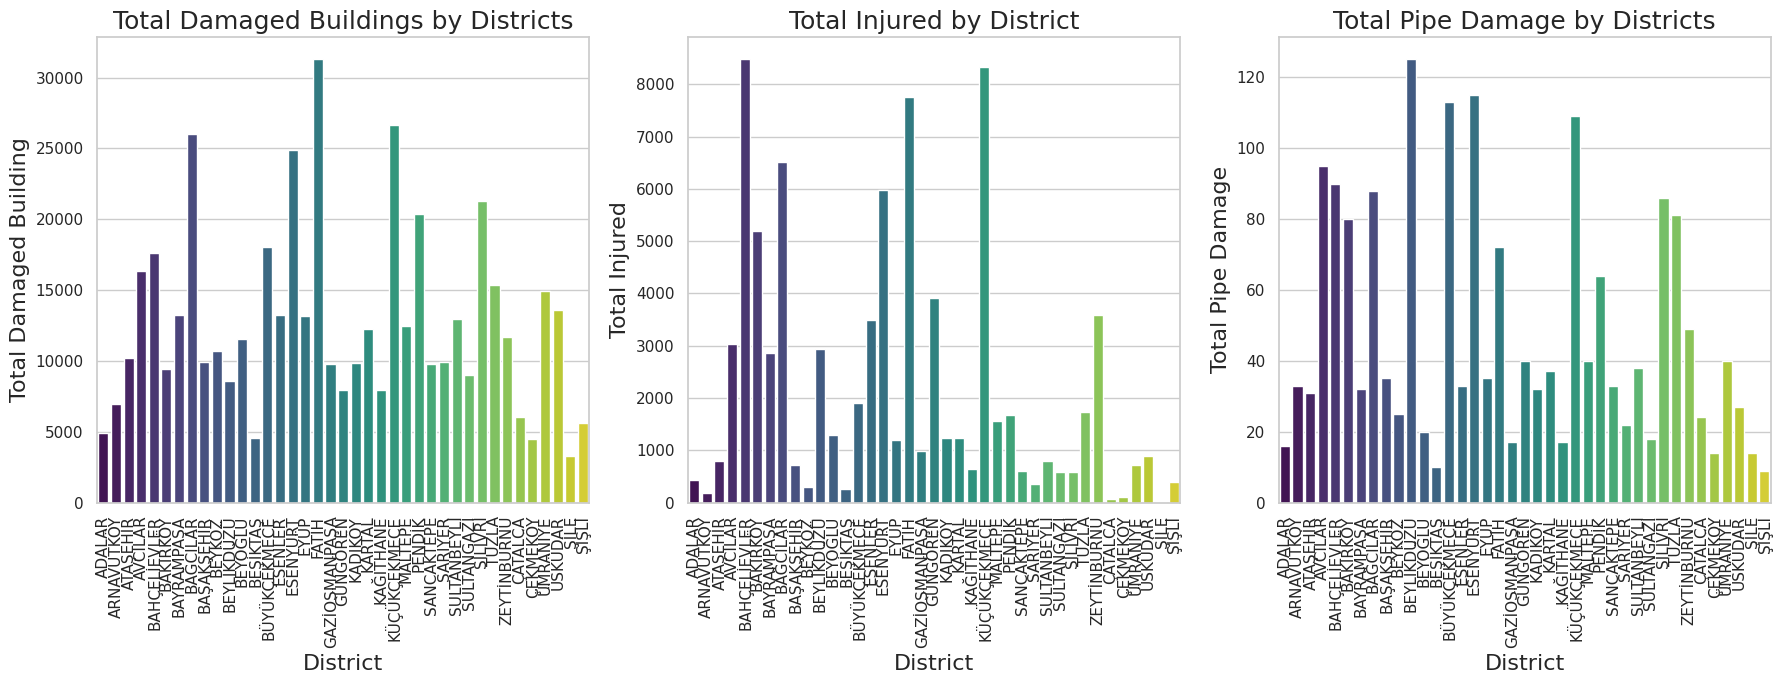

In [ ]:
df_grouped = df.groupby('ilce_adi').agg({
    'toplam_hasarli_bina': 'sum',
    'toplam_yarali': 'sum',
    'toplam_boru_hasari': 'sum'
}).reset_index()

plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='ilce_adi', y='toplam_hasarli_bina', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Damaged Building", fontsize=16)
plt.title('Total Damaged Buildings by Districts', fontsize=18)

plt.subplot(1, 3, 2)
sns.barplot(x='ilce_adi', y='toplam_yarali', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Injured", fontsize=16)
plt.title('Total Injured by District', fontsize=18)

plt.subplot(1, 3, 3)
sns.barplot(x='ilce_adi', y='toplam_boru_hasari', data=df_grouped, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("District", fontsize=16)
plt.ylabel("Total Pipe Damage", fontsize=16)
plt.title('Total Pipe Damage by Districts', fontsize=18)

plt.tight_layout()
plt.show()

#Creates and displays three bar charts showing total damaged buildings, total injured and total pipe damage by district

In [50]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth

# Coğrafi veri setini yükleme
geo_data_url = 'https://raw.githubusercontent.com/ozanyerli/istanbul-districts-geojson/main/istanbul-districts.json'
geo_data = gpd.read_file(geo_data_url)

# IBB verilerini yükleme
ib_data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")
ib_data['risk_seviyesi'] = ib_data['can_kaybi_sayisi']

# GeoDataFrame ile Pandas DataFrame'i birleştirme
geo_data = geo_data.merge(ib_data, left_on='name', right_on='ilce_adi')

# Harita oluşturma
m = folium.Map(location=[41.0082, 28.9784], zoom_start=11)

# Risk seviyelerini haritada gösterme
Choropleth(
    geo_data=geo_data,
    data=geo_data,
    columns=['ilce_adi', 'risk_seviyesi'],
    key_on='feature.properties.ilce_adi',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Risk Seviyesi'
).add_to(m)

# Haritayı kaydetme
m.save('/content/istanbul_risk_haritasi.html')


In [51]:
from folium import Html

# Create HTML with the map
html = Html("""<iframe src="/content/istanbul_risk_haritasi.html" width="800" height="600"></iframe>""", script=True)

# Add HTML to the map
m.add_child(html)

# Display the map (might not render perfectly)
m



PermutationExplainer explainer: 193it [00:25,  4.17it/s]


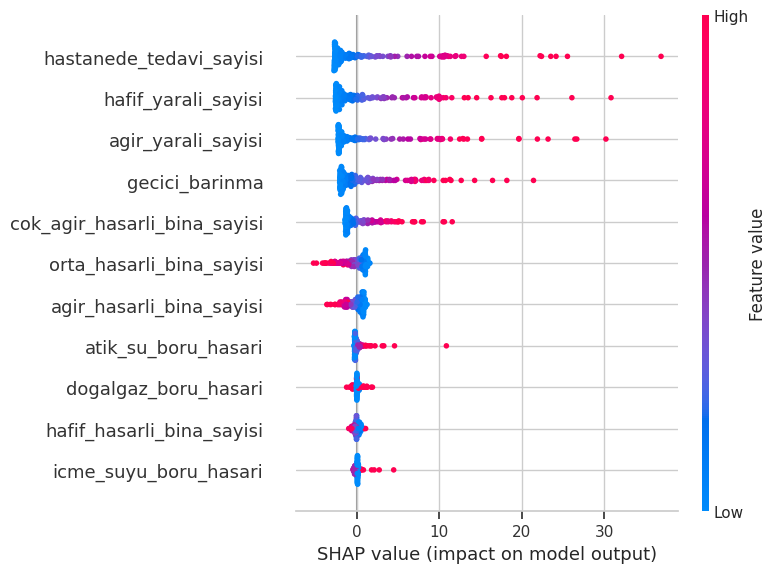

In [ ]:
import shap

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import time
import os

def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    # Load training dataset
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    # Load testing dataset
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    # Calculate weights & biases
    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    # Calculate hidden neuron output matrix H
    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    # Calculate the training accuracy
    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = mean_squared_error(T, Y)
    TrainingR2 = r2_score(T, Y)

    # Calculate the output of testing input
    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = mean_squared_error(TV_T, TY)
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2

# Veri setini yükle
data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Özellikler ve hedef değişkeni ayır
X = data.drop(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt', 'can_kaybi_sayisi', 'atik_su_boru_hasari','icme_suyu_boru_hasari','dogalgaz_boru_hasari'], axis=1)
y = data['can_kaybi_sayisi']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hiperparametre optimizasyonu ve farklı aktivasyon fonksiyonları için döngü
activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000,5000]
c_list = [10, 100, 1000, 10000, 100000,10**12]

# Sonuçları saklamak için bir liste oluştur
results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            # Verileri CELM'in beklediği formata dönüştür
            train_data = np.column_stack((y_train, X_train))
            test_data = np.column_stack((y_test, X_test))

            # Geçici dosyalar oluştur
            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            # CELM modelini çalıştır
            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            # Sonuçları listeye ekle
            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time': TrainingTime,
                'Test Time': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            # Geçici dosyaları sil
            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

# Sonuçları DataFrame'e dönüştür
results = pd.DataFrame(results_list)

# Sonuçları göster
print(results.to_string(index=False))

# En iyi Test RMSE, Test MAE, Test MSE ve Test R² sonuçlarını bul
best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

print("\nEn iyi Test RMSE:")
print(results[results['Test RMSE'] == best_rmse][['Activation', 'Neurons', 'C', 'Test RMSE']].to_string(index=False))

print("\nEn iyi Test MAE:")
print(results[results['Test MAE'] == best_mae][['Activation', 'Neurons', 'C', 'Test MAE']].to_string(index=False))

print("\nEn iyi Test MSE:")
print(results[results['Test MSE'] == best_mse][['Activation', 'Neurons', 'C', 'Test MSE']].to_string(index=False))

print("\nEn iyi Test R²:")
print(results[results['Test R²'] == best_rkare][['Activation', 'Neurons', 'C', 'Test R²']].to_string(index=False))


Activation  Neurons             C  Train Time  Test Time   Train RMSE     Test RMSE    Train MAE     Test MAE    Train MSE     Test MSE  Train R²       Test R²
       sig      100            10    0.003259   0.000604 1.547059e+00      2.041209 8.668611e-01     1.121142 2.393393e+00 4.166534e+00  0.997360  9.920995e-01
       sig      100           100    0.004846   0.001759 8.932774e-01      1.338019 5.682297e-01     0.783177 7.979444e-01 1.790294e+00  0.999120  9.966053e-01
       sig      100          1000    0.003457   0.000765 7.055137e-01      1.277163 4.968874e-01     0.739520 4.977496e-01 1.631146e+00  0.999451  9.969071e-01
       sig      100         10000    0.004946   0.004086 7.459040e-01      1.487677 5.060506e-01     0.797696 5.563728e-01 2.213182e+00  0.999386  9.958034e-01
       sig      100        100000    0.006792   0.002620 8.077060e-01      1.777349 5.143404e-01     0.820174 6.523890e-01 3.158970e+00  0.999280  9.940100e-01
       sig      100 1000000000000    0.0

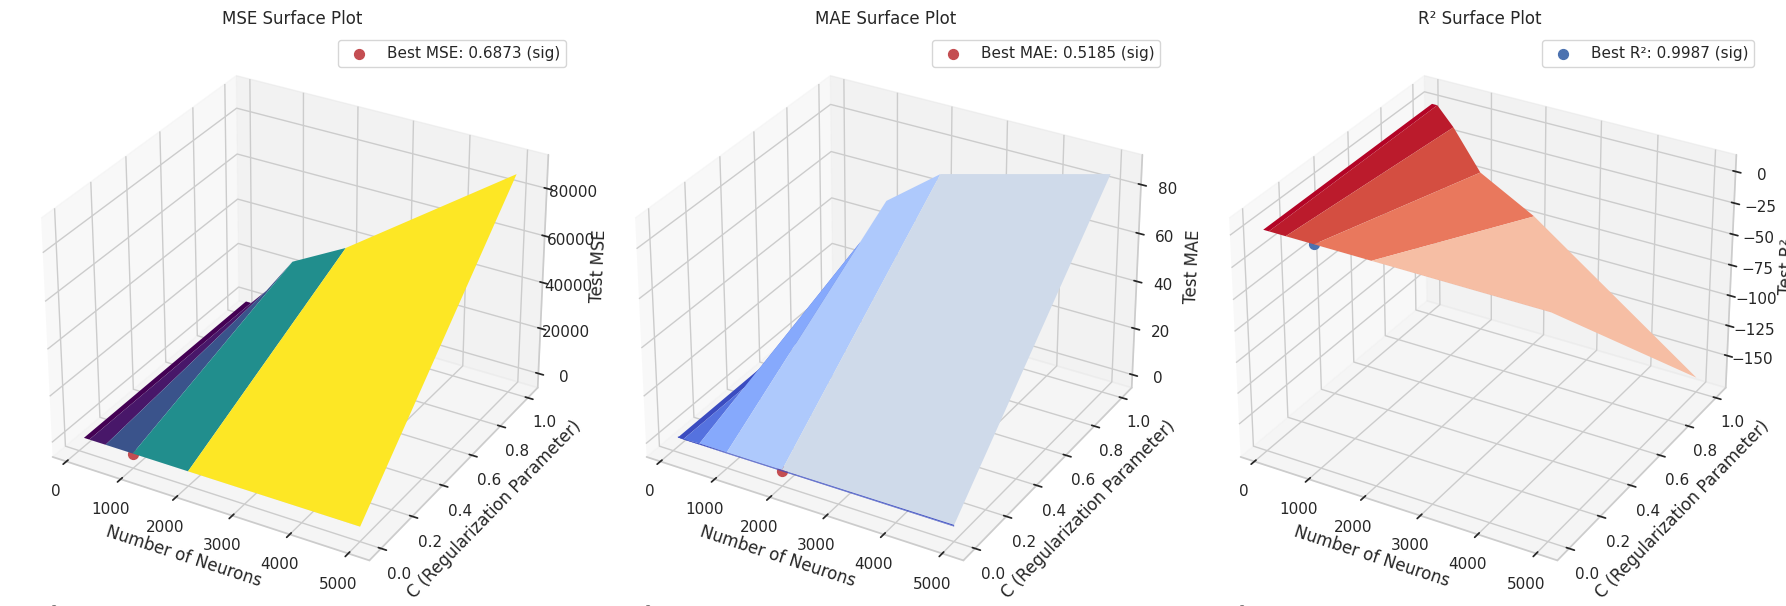

In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import time
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def hardlim(x):
    return np.where(x >= 0, 1, 0)

def tribas(x):
    return np.maximum(1 - np.abs(x), 0)

def radbas(x):
    return np.exp(-np.power(x, 2))

def CELM(TrainingData_File, TestingData_File, NumberofHiddenNeurons, ActivationFunction, C):
    # Load training dataset
    train_data = np.loadtxt(TrainingData_File)
    T = train_data[:, 0].T
    P = train_data[:, 1:].T
    # Load testing dataset
    test_data = np.loadtxt(TestingData_File)
    TV_T = test_data[:, 0].T
    TV_P = test_data[:, 1:].T
    NumberofTrainingData = P.shape[1]
    NumberofTestingData = TV_P.shape[1]
    NumberofInputNeurons = P.shape[0]

    # Calculate weights & biases
    start_time_train = time.time()

    InputWeight = np.random.rand(NumberofHiddenNeurons, NumberofInputNeurons) * 2 - 1
    BiasofHiddenNeurons = np.random.rand(NumberofHiddenNeurons, 1)

    tempH = np.dot(InputWeight, P) + BiasofHiddenNeurons

    # Calculate hidden neuron output matrix H
    if ActivationFunction in ['sig', 'sigmoid']:
        H = 1 / (1 + np.exp(-tempH))
    elif ActivationFunction == 'sin':
        H = np.sin(tempH)
    elif ActivationFunction == 'hardlim':
        H = hardlim(tempH)
    elif ActivationFunction == 'tribas':
        H = tribas(tempH)
    elif ActivationFunction == 'radbas':
        H = radbas(tempH)

    if C == 10 ** 100:
        OutputWeight = np.dot(pinv(H.T), T.T)
    else:
        OutputWeight = np.linalg.solve(np.eye(H.shape[0]) / C + np.dot(H, H.T), np.dot(H, T.T))

    end_time_train = time.time()
    TrainingTime = end_time_train - start_time_train

    # Calculate the training accuracy
    Y = np.dot(H.T, OutputWeight).T
    TrainingRMSE = np.sqrt(np.mean(np.square(T - Y)))
    TrainingMAE = np.mean(np.abs(T - Y))
    TrainingMSE = np.mean(np.square(T - Y))
    TrainingR2 = r2_score(T, Y)

    # Calculate the output of testing input
    start_time_test = time.time()
    tempH_test = np.dot(InputWeight, TV_P) + BiasofHiddenNeurons
    if ActivationFunction in ['sig', 'sigmoid']:
        H_test = 1 / (1 + np.exp(-tempH_test))
    elif ActivationFunction == 'sin':
        H_test = np.sin(tempH_test)
    elif ActivationFunction == 'hardlim':
        H_test = hardlim(tempH_test)
    elif ActivationFunction == 'tribas':
        H_test = tribas(tempH_test)
    elif ActivationFunction == 'radbas':
        H_test = radbas(tempH_test)
    TY = np.dot(H_test.T, OutputWeight).T
    end_time_test = time.time()
    TestingTime = end_time_test - start_time_test
    TestingRMSE = np.sqrt(np.mean(np.square(TV_T - TY)))
    TestingMAE = np.mean(np.abs(TV_T - TY))
    TestingMSE = np.mean(np.square(TV_T - TY))
    TestingR2 = r2_score(TV_T, TY)

    return TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2

# Veri setini yükle
data = pd.read_csv("deprem.csv", encoding="ISO-8859-9", delimiter=";")

# Özellikler ve hedef değişkeni ayır shap ile işe yaramayan featureları drop et
## X = data.drop(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt', 'can_kaybi_sayisi'], axis=1)
X = data.drop(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt', 'can_kaybi_sayisi', 'atik_su_boru_hasari','icme_suyu_boru_hasari','dogalgaz_boru_hasari'], axis=1)
y = data['can_kaybi_sayisi']

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hiperparametre optimizasyonu ve farklı aktivasyon fonksiyonları için döngü
activation_functions = ['sig', 'sin', 'hardlim', 'tribas', 'radbas']
neurons_list = [100, 200, 500, 1000, 2000, 5000]
c_list = [10, 100, 1000, 10000, 100000, 10**10]

# Sonuçları saklamak için bir liste oluştur
results_list = []

for act_func in activation_functions:
    for neurons in neurons_list:
        for c in c_list:
            # Verileri CELM'in beklediği formata dönüştür
            train_data = np.column_stack((y_train, X_train))
            test_data = np.column_stack((y_test, X_test))

            # Geçici dosyalar oluştur
            np.savetxt('temp_train.txt', train_data)
            np.savetxt('temp_test.txt', test_data)

            # CELM modelini çalıştır
            TrainingTime, TestingTime, TrainingRMSE, TestingRMSE, TrainingMAE, TestingMAE, TrainingMSE, TestingMSE, TrainingR2, TestingR2 = CELM(
                'temp_train.txt',
                'temp_test.txt',
                NumberofHiddenNeurons=neurons,
                ActivationFunction=act_func,
                C=c
            )

            # Sonuçları listeye ekle
            results_list.append({
                'Activation': act_func,
                'Neurons': neurons,
                'C': c,
                'Train Time': TrainingTime,
                'Test Time': TestingTime,
                'Train RMSE': TrainingRMSE,
                'Test RMSE': TestingRMSE,
                'Train MAE': TrainingMAE,
                'Test MAE': TestingMAE,
                'Train MSE': TrainingMSE,
                'Test MSE': TestingMSE,
                'Train R²': TrainingR2,
                'Test R²': TestingR2
            })

            # Geçici dosyaları sil
            os.remove('temp_train.txt')
            os.remove('temp_test.txt')

# Sonuçları DataFrame'e dönüştür
results = pd.DataFrame(results_list)

# En iyi Test RMSE, Test MAE ve Test R² sonuçlarını bul
best_rmse = results['Test RMSE'].min()
best_mae = results['Test MAE'].min()
best_mse = results['Test MSE'].min()
best_rkare = results['Test R²'].max()

# En iyi sonuçları seç
best_rmse_row = results[results['Test RMSE'] == best_rmse]
best_mae_row = results[results['Test MAE'] == best_mae]
best_mse_row = results[results['Test MSE'] == best_mse]
best_r2_row = results[results['Test R²'] == best_rkare]

# En iyi aktivasyon fonksiyonlarını bul
best_rmse_activation = best_rmse_row['Activation'].values[0]
best_mae_activation = best_mae_row['Activation'].values[0]
best_mse_activation = best_mse_row['Activation'].values[0]
best_r2_activation = best_r2_row['Activation'].values[0]

# En iyi değerlerin koordinatlarını belirle
best_rmse_coords = (best_rmse_row['Neurons'].values[0], best_rmse_row['C'].values[0])
best_mae_coords = (best_mae_row['Neurons'].values[0], best_mae_row['C'].values[0])
best_mse_coords = (best_mse_row['Neurons'].values[0], best_mse_row['C'].values[0])
best_r2_coords = (best_r2_row['Neurons'].values[0], best_r2_row['C'].values[0])

# Meshgrid oluştur
neurons_list = np.array(neurons_list)
c_list = np.array(c_list)
N, C = np.meshgrid(neurons_list, c_list)

# RMSE, MAE, MSE ve R² Matrislerini Doldur
RMSE = np.zeros((len(c_list), len(neurons_list)))
MAE = np.zeros((len(c_list), len(neurons_list)))
MSE = np.zeros((len(c_list), len(neurons_list)))
R2 = np.zeros((len(c_list), len(neurons_list)))

for idx, c in enumerate(c_list):
    for jdx, neurons in enumerate(neurons_list):
        filtered_result = results[(results['Neurons'] == neurons) & (results['C'] == c)]
        if not filtered_result.empty:
            RMSE[idx, jdx] = filtered_result['Test RMSE'].values[0]
            MAE[idx, jdx] = filtered_result['Test MAE'].values[0]
            MSE[idx, jdx] = filtered_result['Test MSE'].values[0]
            R2[idx, jdx] = filtered_result['Test R²'].values[0]
        else:
            RMSE[idx, jdx] = np.nan
            MAE[idx, jdx] = np.nan
            MSE[idx, jdx] = np.nan
            R2[idx, jdx] = np.nan

# Grafiklerin oluşturulması
fig = plt.figure(figsize=(18, 6))


# MSE Plot
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(N, C, MSE, cmap='viridis', edgecolor='none')
ax1.scatter(best_mse_coords[0], best_mse_coords[1], best_mse, color='r', s=50,
            label=f'Best MSE: {best_mse:.4f} ({best_mse_activation})')
ax1.set_xlabel('Number of Neurons')
ax1.set_ylabel('C (Regularization Parameter)')
ax1.set_zlabel('Test MSE')
ax1.set_title('MSE Surface Plot')
ax1.legend()

# RMSE Plot
##ax2 = fig.add_subplot(142, projection='3d')
##surf2 = ax2.plot_surface(N, C, RMSE, cmap='coolwarm', edgecolor='none', vmin=RMSE.min(), vmax=RMSE.max())
##ax2.scatter(best_rmse_coords[0], best_rmse_coords[1], best_rmse, color='r', s=50,
##            label=f'Best RMSE: {best_rmse:.4f} ({best_rmse_activation})')
##ax2.set_xlabel('Number of Neurons')
##ax2.set_ylabel('C (Regularization Parameter)')
##ax2.set_zlabel('Test RMSE')
##ax2.set_title('RMSE Surface Plot')
##ax2.legend()

# MAE Plot
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(N, C, MAE, cmap='coolwarm', edgecolor='none', vmin=MAE.min(), vmax=MAE.max())
ax2.scatter(best_mae_coords[0], best_mae_coords[1], best_mae, color='r', s=50,
            label=f'Best MAE: {best_mae:.4f} ({best_mae_activation})')
ax2.set_xlabel('Number of Neurons')
ax2.set_ylabel('C (Regularization Parameter)')
ax2.set_zlabel('Test MAE')
ax2.set_title('MAE Surface Plot')
ax2.legend()



# R² Plot
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(N, C, R2, cmap='coolwarm', edgecolor='none', vmin=R2.min(), vmax=R2.max())
ax3.scatter(best_r2_coords[0], best_r2_coords[1], best_rkare, color='b', s=50,
            label=f'Best R²: {best_rkare:.4f} ({best_r2_activation})')
ax3.set_xlabel('Number of Neurons')
ax3.set_ylabel('C (Regularization Parameter)')
ax3.set_zlabel('Test R²')
ax3.set_title('R² Surface Plot')
ax3.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(x, y)

# Özellikleri ve mutual bilgi değerleri DataFrame ile birleştirilir
mi_df = pd.DataFrame({'Özellik': x.columns, 'Mutual Bilgi': mi})
mi_df = mi_df.sort_values(by='Mutual Bilgi', ascending=False)

# En yüksek mutual bilgiye sahip özellik seçilir
selected_features = mi_df.head(10)['Özellik'].tolist()
print("Seçilen Özellikler:", selected_features)

# Seçilen özelliklerle veri seti hazırlanır
X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, random_state=42)
model = rf.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RandomForestRegressor MSE: {mse}")
print(f"RandomForestRegressor R^2 Score: {r2}")

# Özelliklerin önem derecelerini görüntülemek
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Özellik': selected_features, 'Önemi': feature_importances})
importance_df = importance_df.sort_values(by='Önemi', ascending=False)
print(importance_df)


Seçilen Özellikler: ['hastanede_tedavi_sayisi', 'agir_yarali_sayisi', 'hafif_yarali_sayisi', 'gecici_barinma', 'cok_agir_hasarli_bina_sayisi', 'agir_hasarli_bina_sayisi', 'orta_hasarli_bina_sayisi', 'atik_su_boru_hasari', 'hafif_hasarli_bina_sayisi', 'icme_suyu_boru_hasari']
RandomForestRegressor MSE: 1.6548449652777777
RandomForestRegressor R^2 Score: 0.996862113282762
                        Özellik     Önemi
0       hastanede_tedavi_sayisi  0.798708
1            agir_yarali_sayisi  0.099152
2           hafif_yarali_sayisi  0.098262
3                gecici_barinma  0.001565
8     hafif_hasarli_bina_sayisi  0.000703
6      orta_hasarli_bina_sayisi  0.000531
4  cok_agir_hasarli_bina_sayisi  0.000462
5      agir_hasarli_bina_sayisi  0.000338
7           atik_su_boru_hasari  0.000191
9         icme_suyu_boru_hasari  0.000087


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import SVR
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(iterations=300, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_features, verbose=0)
catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_test)

mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoostRegressor MSE: {mse_catboost}")
print(f"CatBoostRegressor R^2 Score: {r2_catboost}")

svm_model = SVR(kernel='rbf', C=100, gamma='scale')  # Kernel ve hiperparametreleri ihtiyacınıza göre ayarlayın
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVR MSE: {mse_svm}")
print(f"SVR R^2 Score: {r2_svm}")

feature_importances = catboost_model.get_feature_importance()
importance_df = pd.DataFrame({'Özellik': X.columns, 'Önemi': feature_importances})
importance_df = importance_df.sort_values(by='Önemi', ascending=False)
print(importance_df)


CatBoostRegressor MSE: 3.255101098700365
CatBoostRegressor R^2 Score: 0.9938277369087779
SVR MSE: 4.289485562593312
SVR R^2 Score: 0.991866356031493
                         Özellik      Önemi
4             agir_yarali_sayisi  32.558296
5        hastanede_tedavi_sayisi  28.672036
6            hafif_yarali_sayisi  27.869796
10                gecici_barinma   2.671601
1       agir_hasarli_bina_sayisi   2.336055
8          icme_suyu_boru_hasari   1.963759
7           dogalgaz_boru_hasari   1.535127
3      hafif_hasarli_bina_sayisi   1.010690
9            atik_su_boru_hasari   0.679551
2       orta_hasarli_bina_sayisi   0.433921
0   cok_agir_hasarli_bina_sayisi   0.269169


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


print(f"CatBoostRegressor MSE: {mse_catboost}")
print(f"CatBoostRegressor R^2 Score: {r2_catboost}")

print(f"SVR MSE: {mse_svm}")
print(f"SVR R^2 Score: {r2_svm}")

feature_importances = catboost_model.get_feature_importance()
importance_df = pd.DataFrame({'Özellik': [f'PC{i+1}' for i in range(X_pca.shape[1])], 'Önemi': feature_importances})
importance_df = importance_df.sort_values(by='Önemi', ascending=False)
print(importance_df)

CatBoostRegressor MSE: 11.475931344565561
CatBoostRegressor R^2 Score: 0.9782395491483378
SVR MSE: 21.817479573340417
SVR R^2 Score: 0.9586300947863685
  Özellik      Önemi
0     PC1  59.529273
1     PC2  27.616196
2     PC3   8.395557
3     PC4   4.458974
